In [1]:
#tokenization
import csv
import pandas as pd

data_Frame = pd.read_csv('bbc-news-data-modified.csv')
data_Frame['Tokens'] = data_Frame['title'] + ' ' + data_Frame['content']
tokens = data_Frame['Tokens'].str.split()
print(len(tokens[0]))





421


In [2]:
#stop word removal
import nltk
from nltk.corpus import stopwords
filtered_tokens = tokens[:]
print(len(filtered_tokens[0]))

stop_words = (stopwords.words('english'))


def filter_stop_words(words):
    return [word for word in words if word.lower() not in stop_words]

tokens = tokens.apply(filter_stop_words)
print(len(tokens[0]))



421
258


In [3]:
#Lemmatization and stemming
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()


def lemmatise_and_stem(words):
    return [stemmer.stem(lemmatizer.lemmatize(word)) for word in words]


tokens = tokens.apply(lemmatise_and_stem)

print(len(tokens[0]))
print(tokens[0])




258
['ad', 'sale', 'boost', 'time', 'warner', 'profit', 'quarterli', 'profit', 'us', 'medium', 'giant', 'timewarn', 'jump', '76%', '$1.13bn', '(£600m)', 'three', 'month', 'december,', '$639m', 'year-earlier.', 'firm,', 'one', 'biggest', 'investor', 'google,', 'benefit', 'sale', 'high-spe', 'internet', 'connect', 'higher', 'advert', 'sales.', 'timewarn', 'said', 'fourth', 'quarter', 'sale', 'rose', '2%', '$11.1bn', '$10.9bn.', 'profit', 'buoy', 'one-off', 'gain', 'offset', 'profit', 'dip', 'warner', 'bros,', 'le', 'user', 'aol.', 'time', 'warner', 'said', 'friday', 'own', '8%', 'search-engin', 'google.', 'internet', 'business,', 'aol,', 'mix', 'fortunes.', 'lost', '464,000', 'subscrib', 'fourth', 'quarter', 'profit', 'lower', 'preced', 'three', 'quarters.', 'however,', 'compani', 'said', "aol'", 'underli', 'profit', 'except', 'item', 'rose', '8%', 'back', 'stronger', 'internet', 'advertis', 'revenues.', 'hope', 'increas', 'subscrib', 'offer', 'onlin', 'servic', 'free', 'timewarn', 'inte

In [4]:
#vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

docs = [' '.join(doc) for doc in tokens]
print(len(docs))

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(docs)

text = pd.DataFrame(data=tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(text.head())


2225
        000  000m   05        10  100  100m  102  104  10bn  10th  ...  \
0  0.027281   0.0  0.0  0.028604  0.0   0.0  0.0  0.0   0.0   0.0  ...   
1  0.000000   0.0  0.0  0.000000  0.0   0.0  0.0  0.0   0.0   0.0  ...   
2  0.000000   0.0  0.0  0.000000  0.0   0.0  0.0  0.0   0.0   0.0  ...   
3  0.022699   0.0  0.0  0.023800  0.0   0.0  0.0  0.0   0.0   0.0  ...   
4  0.000000   0.0  0.0  0.047539  0.0   0.0  0.0  0.0   0.0   0.0  ...   

    yugansk  yuganskneftega  yuganskneftegas      yuko     yukos  yushchenko  \
0  0.000000             0.0              0.0  0.000000  0.000000         0.0   
1  0.000000             0.0              0.0  0.000000  0.000000         0.0   
2  0.438987             0.0              0.0  0.264698  0.132349         0.0   
3  0.000000             0.0              0.0  0.000000  0.000000         0.0   
4  0.000000             0.0              0.0  0.000000  0.000000         0.0   

   zealand  zero  zone  zurich  
0      0.0   0.0   0.0     0.0  
1  

Number of articles in each k-means cluster:
 Cluster
2    782
4    499
1    375
3    323
0    246
Name: count, dtype: int64


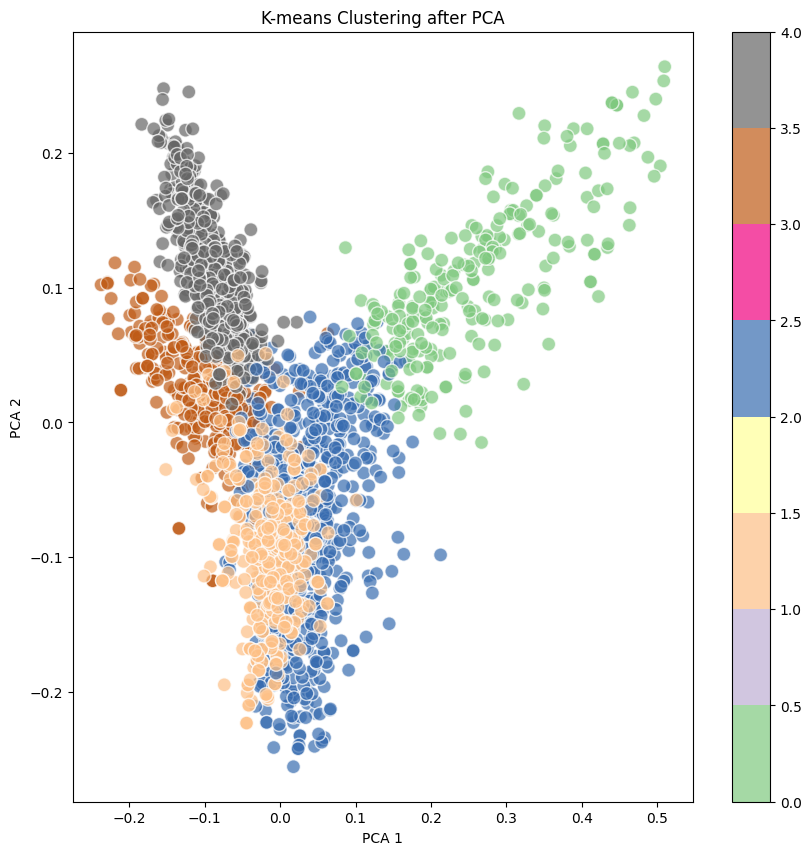

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=0)
kmeans_clusters = kmeans.fit_predict(text)
data_Frame['Cluster'] = kmeans_clusters

cluster_counts = data_Frame['Cluster'].value_counts()
print("Number of articles in each k-means cluster:\n", cluster_counts)


pca = PCA(n_components=2)
reduced_data = pca.fit_transform(text)

# Scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_clusters, cmap='Accent', edgecolors='w', s=100, alpha=0.7)
plt.colorbar()
plt.title("K-means Clustering after PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

Utilize the Within Cluster Sum of Squares (WCSS) method to identify the ideal number of clusters k for the K-means algorithm. Evaluate potential cluster counts ranging from 1 to 10. For each prospective k, initialize the KMeans module with the current cluster count, leveraging the “k-means++” technique for centroid initialization, setting a cap of 300 iterations per individual run, opting for 10 initial centroid configurations, and ensuring reproducibility with a random state of 0. Illustrate the resulting WCSS values on a plot. The plot’s “elbow” point, where the decline becomes pronounced, denotes the optimal k value.(3 points).

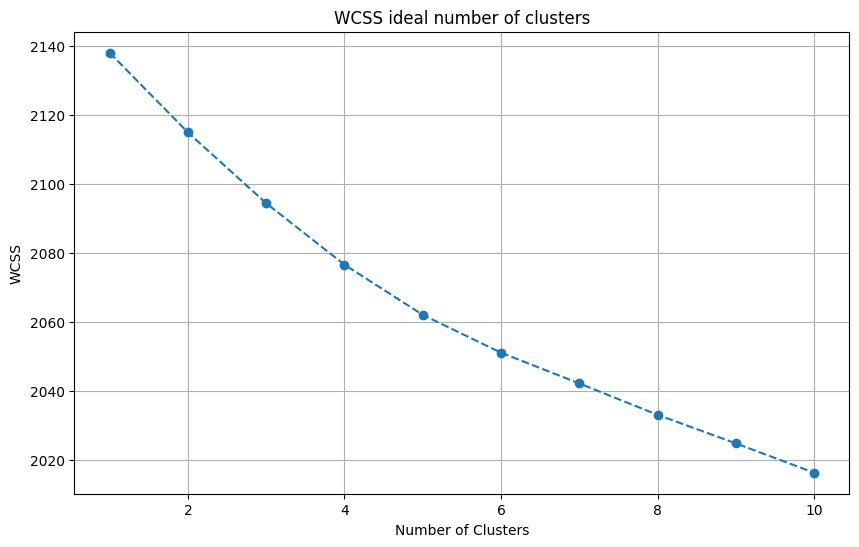

In [16]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('WCSS ideal number of clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

From the graph, best value seems to be 5

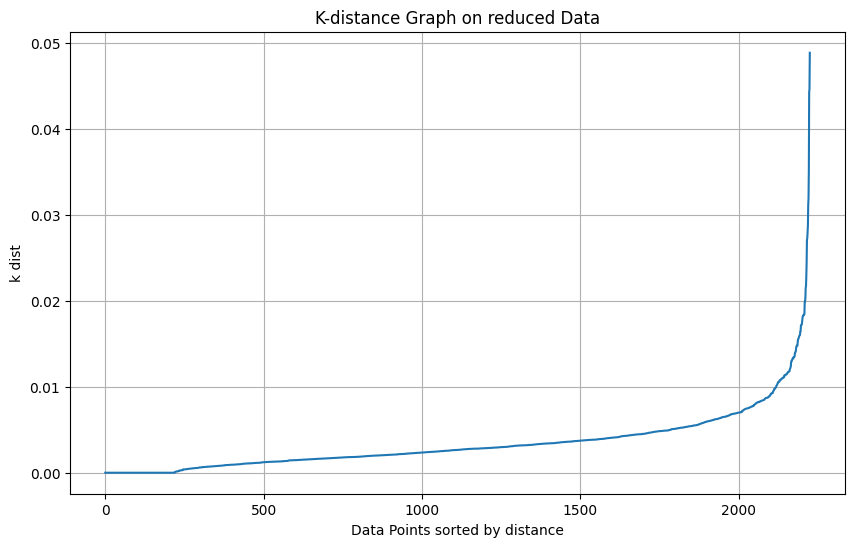

In [19]:
#2. DBSCAN Clustering:

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np


min_samples = 2
nearest_neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors = nearest_neighbors.fit(reduced_data)
distances, indices = neighbors.kneighbors(reduced_data)

# Sort distances and pick the second one (the first one is distance to itself which is 0)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

# Plotting the K-distance Graph
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title("K-distance Graph on reduced Data")
plt.xlabel("Data Points sorted by distance")
plt.ylabel("k dist")
plt.grid(True)
plt.show()

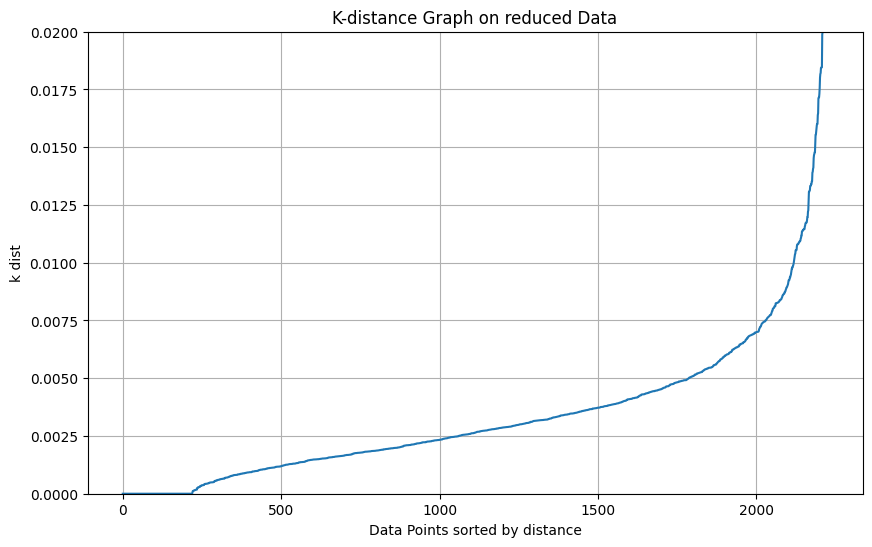

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title("K-distance Graph on reduced Data")
plt.xlabel("Data Points sorted by distance")
plt.ylabel("k dist")
plt.ylim(0, 0.02)
plt.grid(True)
plt.show()

from above graphs, eps is approximated to be 0.01

Number of clusters:  110
[-1 -1 -1 ... -1 -1 -1]


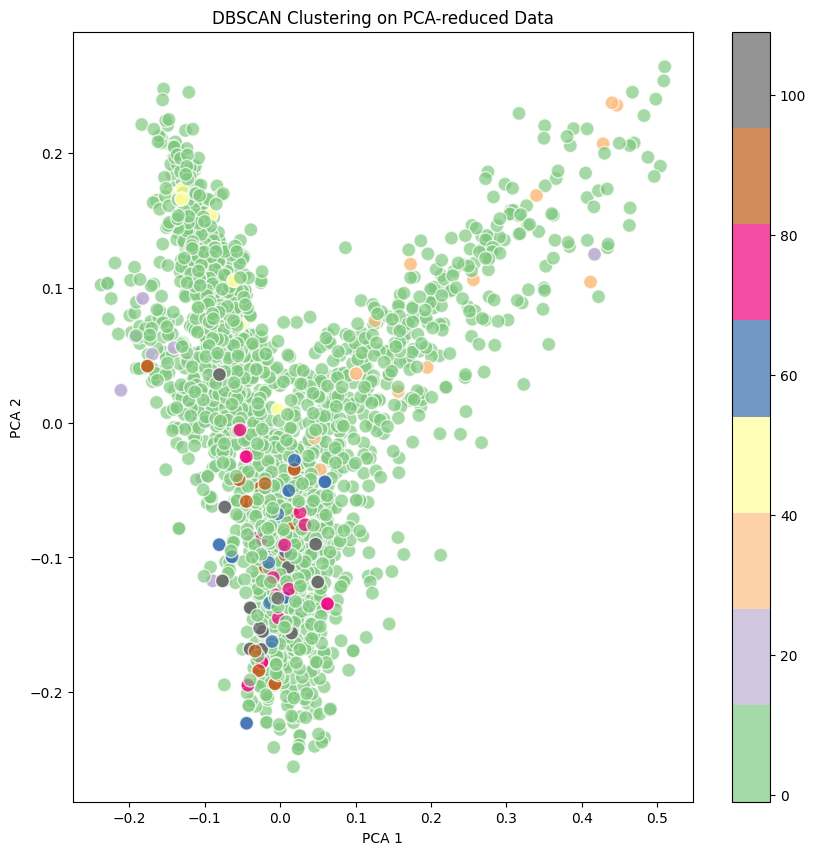

Number of articles in each cluster (DBSCAN):

Cluster -1: 2005 articles
Cluster 69: 2 articles
Cluster 80: 2 articles
Cluster 79: 2 articles
Cluster 78: 2 articles
Cluster 77: 2 articles
Cluster 76: 2 articles
Cluster 75: 2 articles
Cluster 74: 2 articles
Cluster 73: 2 articles
Cluster 72: 2 articles
Cluster 71: 2 articles
Cluster 70: 2 articles
Cluster 68: 2 articles
Cluster 82: 2 articles
Cluster 67: 2 articles
Cluster 66: 2 articles
Cluster 65: 2 articles
Cluster 64: 2 articles
Cluster 63: 2 articles
Cluster 62: 2 articles
Cluster 61: 2 articles
Cluster 60: 2 articles
Cluster 59: 2 articles
Cluster 58: 2 articles
Cluster 57: 2 articles
Cluster 81: 2 articles
Cluster 83: 2 articles
Cluster 55: 2 articles
Cluster 97: 2 articles
Cluster 108: 2 articles
Cluster 107: 2 articles
Cluster 106: 2 articles
Cluster 105: 2 articles
Cluster 104: 2 articles
Cluster 103: 2 articles
Cluster 102: 2 articles
Cluster 101: 2 articles
Cluster 100: 2 articles
Cluster 99: 2 articles
Cluster 98: 2 articles

In [23]:
eps_val = 0.01
dbscan = DBSCAN(eps=eps_val, min_samples=min_samples)
dbscan_clusters = dbscan.fit_predict(tfidf_matrix)
data_Frame['DBSCAN_Cluster'] = dbscan_clusters
labels = dbscan.labels_
print("Number of clusters: ", len(set(labels))-1) 
print(labels)
plt.figure(figsize=(10, 10))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=dbscan_clusters, cmap='Accent', edgecolors='w', s=100, alpha=0.7)
plt.colorbar()
plt.title("DBSCAN Clustering on PCA-reduced Data")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()



dbscan_cluster_counts = data_Frame['DBSCAN_Cluster'].value_counts()

print("Number of articles in each cluster (DBSCAN):\n")
for cluster_label, count in dbscan_cluster_counts.items():
    print(f'Cluster {cluster_label}: {count} articles')


noise_points = sum(data_Frame['DBSCAN_Cluster'] == -1)
print(f"Number of detected noise points: {noise_points}")


THere seems to be quite a bit of noise points (2005) and 110 clusters in the DBScan clustering. The DBscan clustering is not very good at clustering the data points. The Kmeans seems to be better at clustering the data points as most of the clusters have 2 articles which is the minimul set of articles that can be clustered together. In fact it seems that DBScan performed worse than all other clustering algorithms.

[1 1 1 ... 1 0 2]
Number of articles in each cluster (GMM):
 GMM_Cluster
1    819
2    501
3    354
0    345
4    206
Name: count, dtype: int64


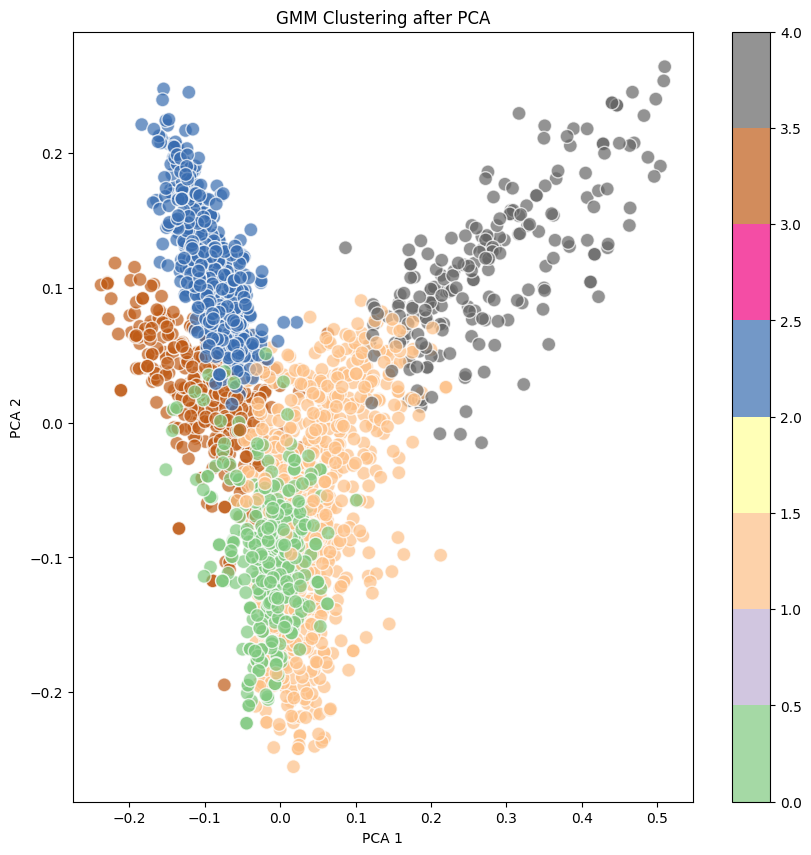

In [24]:
#Gaussian Mixture Model (GMM) Clustering: Allocate the news articles into 5 clusters leveraging the Gaussian Mixture Model.
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5, random_state=0)
gmm_clusters = gmm.fit_predict(text)
data_Frame['GMM_Cluster'] = gmm_clusters
labels = gmm.predict(text)
print(labels)


gmm_cluster_counts = data_Frame['GMM_Cluster'].value_counts()
print("Number of articles in each cluster (GMM):\n", gmm_cluster_counts)


plt.figure(figsize=(10, 10))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=gmm_clusters, cmap='Accent', edgecolors='w', s=100, alpha=0.7)
plt.colorbar()
plt.title("GMM Clustering after PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


[0 0 0 ... 0 4 4]
Number of articles in each cluster (Agglomerative Clustering):
 Agglo_Cluster
0    1052
1     492
4     343
3     180
2     158
Name: count, dtype: int64


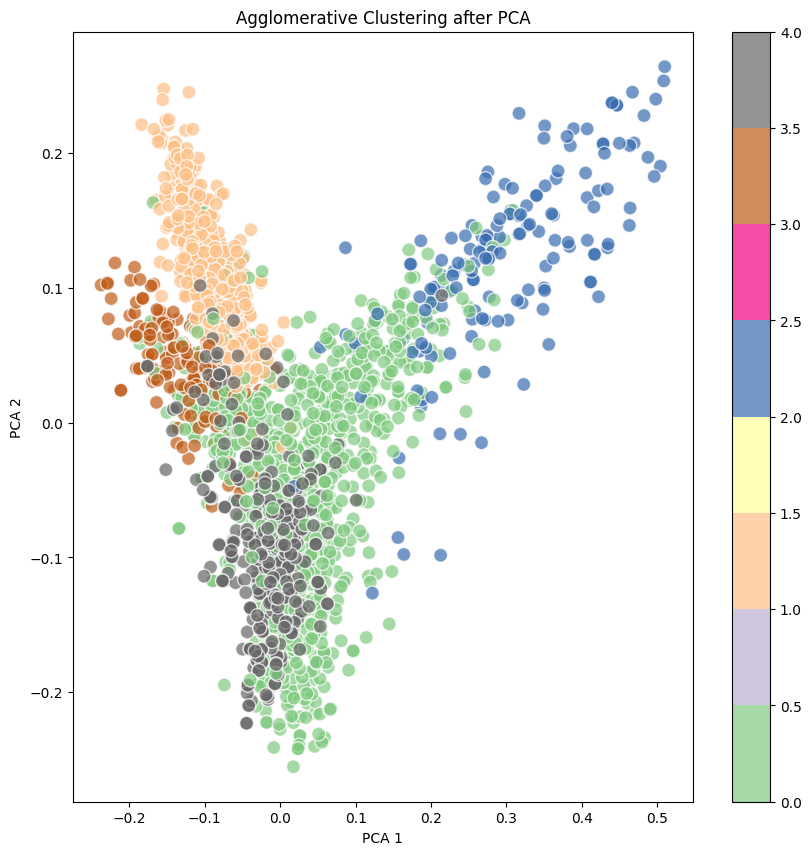

In [25]:
#Agglomerative Clustering
n_clusters = 5

from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=n_clusters)
agg_clusters = agg.fit_predict(text)
labels = agg.labels_
print(labels)


data_Frame['Agglo_Cluster'] = agg_clusters

# Display the number of articles in each cluster
agglo_cluster_counts = data_Frame['Agglo_Cluster'].value_counts()
print("Number of articles in each cluster (Agglomerative Clustering):\n", agglo_cluster_counts)

# Visualization using PCA-reduced data
plt.figure(figsize=(10, 10))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=agg_clusters, cmap='Accent', edgecolors='w', s=100, alpha=0.7)
plt.colorbar()
plt.title("Agglomerative Clustering after PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()